In [1]:
print(0.92388**2)
print(0.382683**2)
print(0.382683**2+0.92388**2)
print(1024*0.92388**2)

0.8535542544000001
0.146446278489
1.000000532889
874.0395565056001


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
import qiskit.quantum_info as qi
import numpy as np
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

from qiskit.extensions import RXGate, XGate, CXGate

Norm = 1/np.sqrt(2)

# create empty gate for 'fake input' --------------------------------

# input 0
in_zero = qi.Operator([[1,0],
                       [0,1]])
# input 1 (X on 0)
in_one = qi.Operator([[0,1],
                      [1,0]])

# input + (Hadamard on 0)
in_plus = qi.Operator([[Norm,Norm],
                       [Norm,-Norm]])


# input - (Hadamard on 1)
in_minus = qi.Operator([[Norm, Norm],
                         [-Norm, Norm]])

# empty box for drop down
empty_box = qi.Operator([[1,0],
                         [0,1]])  # use in_zero ?


# 2 qubit gate box for drop down
empty_box_control = qi.Operator([[1,0,0,0],
                         [0,1,0,0],
                         [0,0,1,0],
                         [0,0,0,1]])

#measurement box 
measure_z = qi.Operator([[1,0],
                         [0,1]]) 

measure_x = qi.Operator([[1,1],
                         [1,-1]]) 



#function read the drop_down, used to replace in the circuit the "empty" boxes with the chosen gates by the player
def drop_down(circuit, drop_number, q_index):
    ''' input: circuit (level)
        number of drop down menu
        index of qubit for adding the gate
    output: chosen gate appended to circuit'''
    if drop_number == 'I':
        circuit.id(q_index)
    elif drop_number == 'X':
        circuit.x(q_index)
    elif drop_number == 'Y':
        circuit.y(q_index)
    elif drop_number == 'Z':
        circuit.z(q_index)
    elif drop_number == 'H':
        circuit.h(q_index)


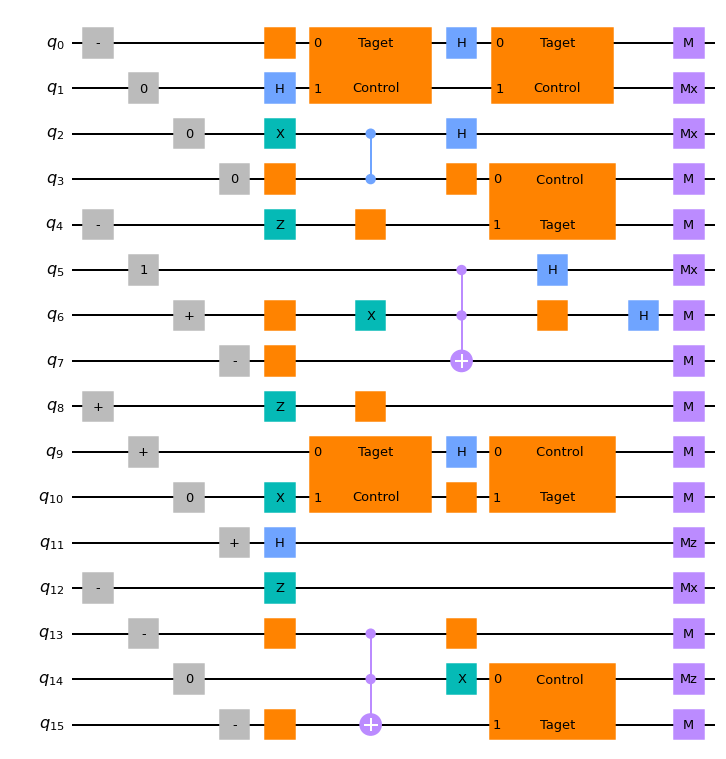

In [3]:
circ_02 = QuantumCircuit(16)

#sudoku 4x4: choice 0 --> ket(0), 1 -->ket(+), 2-->ket(-), 4-->ket(1)
#create input state/sudoku input

#qubit 0 and 1
circ_02.unitary(in_minus, 0, label="-")
circ_02.unitary(in_minus, 4, label="-")
circ_02.unitary(in_plus, 8, label="+")
circ_02.unitary(in_minus, 12, label="-")
circ_02.barrier()

circ_02.unitary(in_zero, 1, label="0")
circ_02.unitary(in_one, 5, label="1")
circ_02.unitary(in_plus, 9, label="+")
circ_02.unitary(in_minus, 13, label="-")
circ_02.barrier()

circ_02.unitary(in_zero, 2, label="0")
circ_02.unitary(in_plus, 6, label="+")
circ_02.unitary(in_zero, 10, label="0")
circ_02.unitary(in_zero, 14, label="0")
circ_02.barrier()

circ_02.unitary(in_zero, 3, label="0")
circ_02.unitary(in_minus, 7, label="-")
circ_02.unitary(in_plus, 11, label="+")
circ_02.unitary(in_minus, 15, label="-")
circ_02.barrier()

#qubit 0 and 1
circ_02.unitary(empty_box, 0, label=" ")
circ_02.h(1)
circ_02.unitary(empty_box_control, [0,1], label=r"Taget"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Control")
circ_02.h(0)
circ_02.unitary(empty_box_control, [0,1], label=r"Taget"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Control")

#qubit 2 and 3 and 4
circ_02.x(2)
circ_02.unitary(empty_box, 3, label=" ")
circ_02.cz(2,3)
circ_02.z(4)

circ_02.h(2)
circ_02.unitary(empty_box, 3, label=" ")
circ_02.unitary(empty_box, 4, label=" ")
circ_02.unitary(empty_box_control, [3,4], label=r" Control"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Taget")


# qubit 5 6 7
circ_02.unitary(empty_box, 6, label=" ")
circ_02.x(6)
circ_02.unitary(empty_box, 7, label=" ")
circ_02.toffoli(5,6,7)
circ_02.h(5)
circ_02.unitary(empty_box, 6, label=" ")
circ_02.h(6)

#qubit 8
circ_02.z(8)
circ_02.unitary(empty_box, 8, label=" ")

# qubits 9,10
circ_02.x(10)
circ_02.unitary(empty_box_control, [9, 10], label=r"Taget"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Control")
circ_02.h(9)
circ_02.unitary(empty_box, 10, label=" ")
circ_02.unitary(empty_box_control, [9,10], label=r" Control"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Taget")

# qubits 11
circ_02.h(11)

# qubits 12
circ_02.z(12)

# qubits 13,14,15
circ_02.unitary(empty_box, 13, label=" ")
circ_02.unitary(empty_box, 15, label=" ")
circ_02.toffoli(13,14,15)
circ_02.unitary(empty_box, 13, label=" ")
circ_02.x(14)
circ_02.unitary(empty_box_control, [14,15], label=r" Control"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Taget")

circ_02.barrier()

measure = ['M']*16
measure[1]='Mx'
measure[2]='Mx'
measure[5]='Mx'
measure[11]='Mz'
measure[12]='Mx'
measure[14]='Mz'

#measurement drop down
for qubit in range(len(measure)) :
    circ_02.unitary(empty_box, qubit, label=measure[qubit])



circ_02.draw('mpl', plot_barriers=False,   style={'displaycolor': {'0': ('#BBBBBB'),  '1': ('#BBBBBB'),  '+': ('#BBBBBB'),  '-': ('#BBBBBB'), ' ':('#FF8300'), ' M ': ('#FF8300'), " Control"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Taget":('#FF8300'), "Taget"
           "\n"  # Newline: the backslash is interpreted as usual
           "\n"
           "\n"
           r"Control":('#FF8300')}})